In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
img_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,validation_split=0.3)

In [3]:
base='Object Detection(Ass6)/caltech-101-img'
img_train=img_gen.flow_from_directory(
        directory=base,
        target_size=(64,64),
        shuffle=True,
        batch_size=32,
        subset="training",
        class_mode="categorical"
    )
img_test=img_gen.flow_from_directory(
        directory=base,
        target_size=(64,64),
        shuffle=True,
        batch_size=32,
        subset="validation",
        class_mode="categorical"
    )

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


In [4]:
base_model=tf.keras.applications.VGG16(weights='Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',input_shape=(64,64,3),include_top=False)

In [8]:
base_model.trainable=False
dev_model=tf.keras.models.Sequential(
    [base_model,
     tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102,activation="softmax")]
)
dev_model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
dev_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 512)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               52326     
                                                                 
Total params: 14767014 (56.33 MB)
Trainable params: 52326 (204.40 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [10]:
dev_model.fit(img_train, validation_data=img_test, batch_size=32,steps_per_epoch=100, epochs=2)

Epoch 1/2
100/100 [==============================] - 102s 1s/step - loss: 11.7991 - accuracy: 0.3809 - val_loss: 7.8157 - val_accuracy: 0.4596
Epoch 2/2
100/100 [==============================] - 66s 660ms/step - loss: 6.6532 - accuracy: 0.5384 - val_loss: 7.7408 - val_accuracy: 0.5111


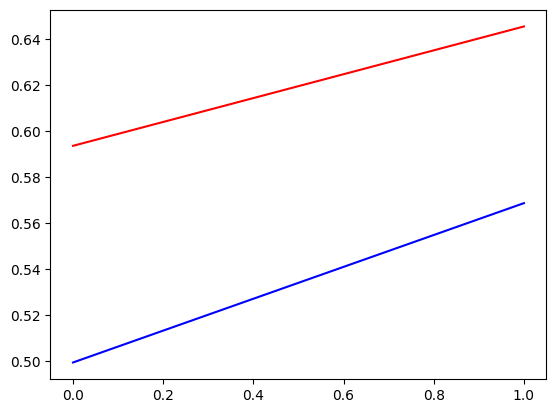

In [10]:
plt.plot(dev_model.history.history["accuracy"],c="r")
plt.plot(dev_model.history.history["val_accuracy"],c="b")

In [11]:
count=4
for layer in base_model.layers:
    if count==0:
        break
    layer.trainable=True
    count-=1

In [12]:
dev_model=tf.keras.models.Sequential(
    [base_model,
     tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102,activation="softmax")]
)
dev_model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
dev_model.fit(img_train,validation_data=img_test,batch_size=32,epochs=2)

Epoch 1/2
202/202 [==============================] - 83s 408ms/step - loss: 10.1107 - accuracy: 0.4258 - val_loss: 8.1017 - val_accuracy: 0.4759
Epoch 2/2
202/202 [==============================] - 84s 415ms/step - loss: 5.7167 - accuracy: 0.6026 - val_loss: 9.1024 - val_accuracy: 0.5533


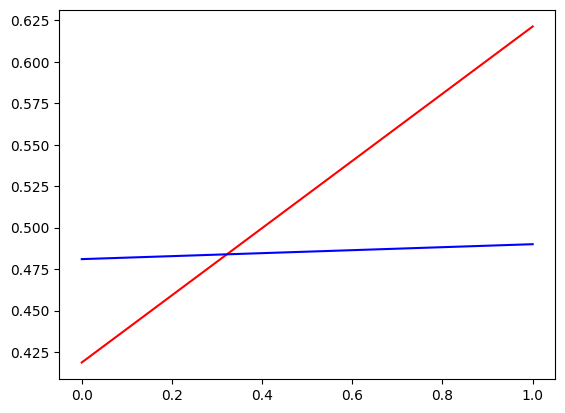

In [19]:
plt.plot(dev_model.history.history["accuracy"],c="r")
plt.plot(dev_model.history.history["val_accuracy"],c="b")